# G-Research Crypto Forecast

## Part 0: Introduction

* ### Описание:

#### Ежедневно на рынке криптовалют проводятся операции на сумму более 40 миллиардов долларов. Криптовалюты являются одними из самых популярных активов как для спекуляций, так и для инвестиций. При этом рынок криптовалят является достаточно волатильным. Датасет содержит информацию о прошлых сделках по криптовалютам. Например, таких Bitcoin и Ethereum. 
#### Задача - предсказать будущую прибыль криптовалют.

* ### Датасеты:

1. train.csv - обучающий датасет

    * timestamp - отметка времени в минутах в формате Unix. Отметки времени в этом наборе данных кратны 60, что указывает на поминутные данные
    * Asset_ID - ID криптовалюты
    * Count - общее количество сделок, состоявшихся в данную минуту
    * Open - стомиость криптовалюты в начале минуты, долларах США
    * High - самая высокая стоимость криптовалюты за минуту, доллар США
    * Low - самая низкая стоимость криптовалюты цена за минуту, доллар США
    * Volume - количество единиц криптовалюты, проданных или купленных в течение минуты
    * VWAP - средневзвешенная стоимость криптовалюты за минуту, доллар США
    * Target - остаточная логарифмическая доходность актива на горизонте 15 минут


2. asset_details.csv - датасет с дополнительной информацией

    * Asset_ID - ID криптовалюты
    * Weight - вес каждого актива, используемый для взвешивания его относительной важности в метрике оценки
    * Asset_Name - название криптовалюты
   
## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data)
* ### Импорт библиотек, чтение '.csv' файлов

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis)
* ### Head, Info
* ### Обработка датасета asset_details
* ### Добавление названия криптовалюты в обучающий датасет
* ### Анализ недостающих элементов в Target
* ### Удаление строк с недостающими элементами в Target
* ### Визуализация данных

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation)
* ### StandardScaler
* ### Создание датасетов для машинного обучения
* ### 'Train\Valid' split


## [Part 4: Machine Learning](#Part-4:-Machine-Learning)
* ### Linear Regression


## Part 1: Import, Load Data

* ### Import 

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

* ### Load Data 

In [2]:
#загрузим первые 100 тысяч строк
df = pd.read_csv("train.csv", nrows=100000)

In [3]:
asset_details = pd.read_csv("asset_details.csv", nrows=100000) 

## Part 2: Exploratory-Data-Analysis

* ### Head

In [4]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [5]:
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


* ### Info 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  100000 non-null  int64  
 1   Asset_ID   100000 non-null  int64  
 2   Count      100000 non-null  float64
 3   Open       100000 non-null  float64
 4   High       100000 non-null  float64
 5   Low        100000 non-null  float64
 6   Close      100000 non-null  float64
 7   Volume     100000 non-null  float64
 8   VWAP       100000 non-null  float64
 9   Target     97604 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 7.6 MB


Есть пропущенные значения в колонке Target. Их нужно будет заполнить

In [7]:
df["Target"].describe()

count    97604.000000
mean         0.000271
std          0.010470
min         -0.099856
25%         -0.004165
50%          0.000000
75%          0.004304
max          0.129324
Name: Target, dtype: float64

<AxesSubplot:xlabel='Target', ylabel='Count'>

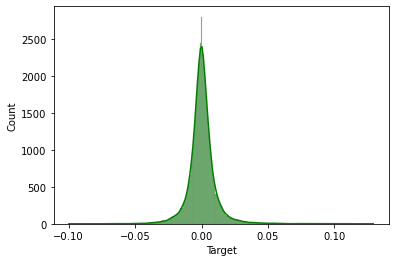

In [8]:
sns.histplot(df['Target'], color='g', kde=True)

Распределение значений Target близко к нормальному

* ### Обработка датасета asset_details

Зададим ID криптовалюты как индекс данного датасета

In [9]:
asset_details.set_index("Asset_ID", inplace=True)

In [10]:
asset_details

,Weight,Asset_Name
Asset_ID,,
2,2.397895,Bitcoin Cash
0,4.304065,Binance Coin
1,6.779922,Bitcoin
5,1.386294,EOS.IO
7,2.079442,Ethereum Classic
6,5.894403,Ethereum
9,2.397895,Litecoin
11,1.609438,Monero
13,1.791759,TRON


* ### Добавление названия криптовалюты в обучающий датасет

In [11]:
df["Name"] = df["Asset_ID"].apply(lambda x: asset_details.loc[x][-1])

In [12]:
df = df.set_index("Name").reset_index()

In [13]:
df.head()

,Name,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,Bitcoin Cash,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,Binance Coin,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,Bitcoin,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,EOS.IO,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,Ethereum Classic,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


* ### Анализ недостающих элементов в Target

In [14]:
#Посмотрим, какие криптовалюты и сколько не имеют Target
df[df["Target"].isnull()]["Name"].value_counts()

Monero              1221
EOS.IO               796
Ethereum Classic     215
Binance Coin         164
Name: Name, dtype: int64

In [15]:
for name in asset_details["Asset_Name"]:
    if name in set(df[df["Target"].isnull()]["Name"]):
        name_null_count = dict(df[df["Target"].isnull()]["Name"].value_counts())[name]
        name_full_count = df[df["Name"] == name]["Name"].value_counts()[-1]
        print(f"Количество NAN у криптовалюты {name}: {name_null_count} из {name_full_count}")
        print(f"В процентном соотношении: {round(name_null_count / name_full_count * 100, 2)}%")
        print()

Количество NAN у криптовалюты Binance Coin: 164 из 12485
В процентном соотношении: 1.31%

Количество NAN у криптовалюты EOS.IO: 796 из 12230
В процентном соотношении: 6.51%

Количество NAN у криптовалюты Ethereum Classic: 215 из 12579
В процентном соотношении: 1.71%

Количество NAN у криптовалюты Monero: 1221 из 11947
В процентном соотношении: 10.22%



* ### Удаление строк с недостающими элементами в Target

In [16]:
df_without_null = df.drop(df[df["Target"].isnull()]["Name"].keys(), axis=0)

In [17]:
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97604 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       97604 non-null  object 
 1   timestamp  97604 non-null  int64  
 2   Asset_ID   97604 non-null  int64  
 3   Count      97604 non-null  float64
 4   Open       97604 non-null  float64
 5   High       97604 non-null  float64
 6   Low        97604 non-null  float64
 7   Close      97604 non-null  float64
 8   Volume     97604 non-null  float64
 9   VWAP       97604 non-null  float64
 10  Target     97604 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 8.9+ MB


In [18]:
df_without_null.head(10)

,Name,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,Bitcoin Cash,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,Binance Coin,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,Bitcoin,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,EOS.IO,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,Ethereum Classic,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,Ethereum,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,Litecoin,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
8,Bitcoin Cash,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,Binance Coin,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875
10,Bitcoin,1514764920,1,235.0,13835.036000,14052.3000,13680.0000,13828.102000,31.046432,13840.362591,-0.015037


* ### Визуализация данных

<AxesSubplot:xlabel='timestamp', ylabel='Open'>

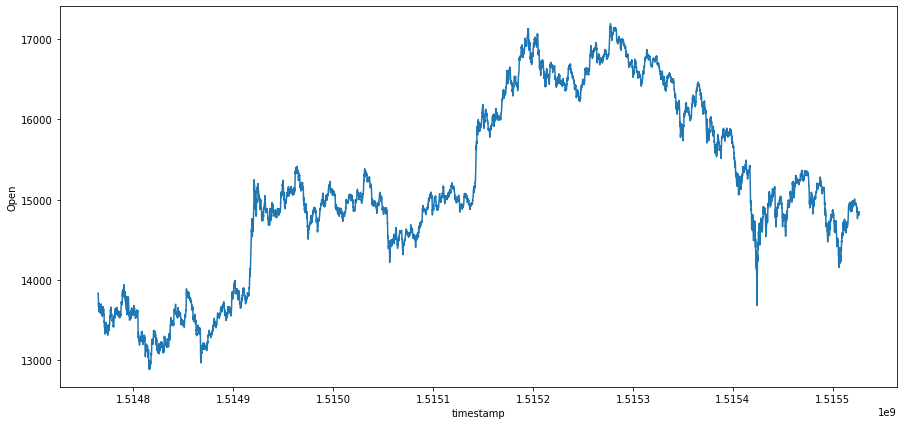

In [19]:
#Например, график цены Bitcoin на открытии
plt.figure(figsize=(15, 7))
sns.lineplot(x=df[df["Name"] == "Bitcoin"]["timestamp"], y=df[df["Name"] == "Bitcoin"]["Open"])

<AxesSubplot:xlabel='timestamp', ylabel='Open'>

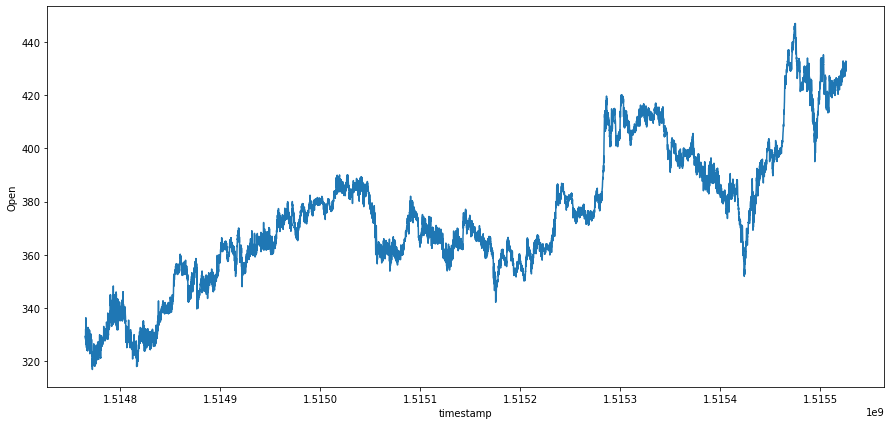

In [20]:
#Например, график цены Monero на открытии
plt.figure(figsize=(15, 7))
sns.lineplot(x=df[df["Name"] == "Monero"]["timestamp"], y=df[df["Name"] == "Monero"]["Open"])

Посмотрим график кореляции

<AxesSubplot:>

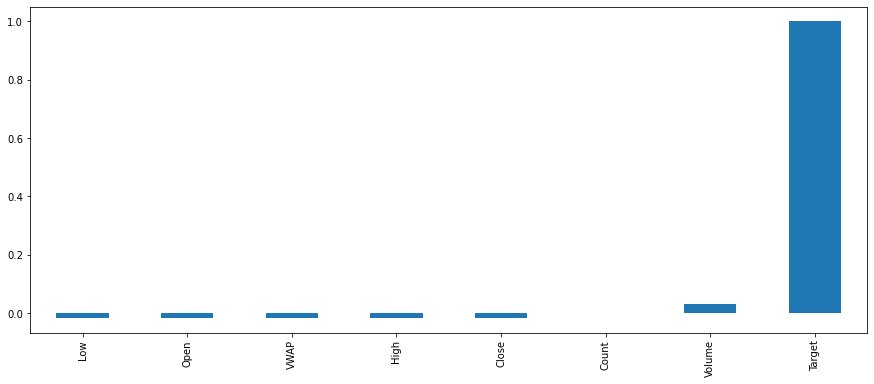

In [21]:
#Посмотрим, какие фичи коррелируют с Target
df_without_null.drop(["timestamp", "Asset_ID"], axis=1).corr()["Target"].sort_values().plot(kind="bar", figsize=(15, 6))

## Part 3: Data Wrangling and Transformation

* ### StandardScaler

In [22]:
features = df_without_null.drop(["timestamp", "Asset_ID", "Count", "Name"], axis=1).columns

In [23]:
features

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Target'], dtype='object')

In [24]:
sc = StandardScaler()
df_without_null_scaled = sc.fit_transform(df_without_null.drop(["timestamp", "Asset_ID", "Count", "Name"], axis=1))

In [25]:
df_without_null_scaled = pd.DataFrame(df_without_null_scaled, columns=features)

In [26]:
df_without_null_scaled

,Open,High,Low,Close,Volume,VWAP,Target
0,-0.024067,-0.022942,-0.024679,-0.024478,-0.283093,-0.024759,-0.428749
1,-0.500484,-0.500412,-0.500508,-0.500482,-0.260371,-0.500483,-1.401120
2,2.281239,2.296402,2.266521,2.284183,-0.278361,2.279630,-1.424449
3,-0.500659,-0.500586,-0.500685,-0.500658,2.255234,-0.500659,-1.355607
4,-0.496986,-0.496939,-0.496994,-0.496992,-0.243965,-0.496990,-0.815121
...,...,...,...,...,...,...,...
97599,-0.498688,-0.498613,-0.498699,-0.498672,-0.267685,-0.498678,-0.274379
97600,2.483343,2.472935,2.485137,2.481164,-0.283053,2.481570,-0.229700
97601,-0.500328,-0.500257,-0.500350,-0.500326,-0.265686,-0.500327,-0.537961
97602,-0.495307,-0.495272,-0.495307,-0.495318,-0.175423,-0.495306,0.110813


* ### Создание датасетов для машинного обучения

In [27]:
X = df_without_null_scaled.drop("Target", axis=1)

In [28]:
X.head()

,Open,High,Low,Close,Volume,VWAP
0,-0.024067,-0.022942,-0.024679,-0.024478,-0.283093,-0.024759
1,-0.500484,-0.500412,-0.500508,-0.500482,-0.260371,-0.500483
2,2.281239,2.296402,2.266521,2.284183,-0.278361,2.279630
3,-0.500659,-0.500586,-0.500685,-0.500658,2.255234,-0.500659
4,-0.496986,-0.496939,-0.496994,-0.496992,-0.243965,-0.496990


In [29]:
y = df_without_null_scaled["Target"]

In [30]:
y.head()

0   -0.428749
1   -1.401120
2   -1.424449
3   -1.355607
4   -0.815121
Name: Target, dtype: float64

* ### 'Train\Valid' split

Возьмем первые 80% данных в качестве обучающих. Остальные 20% данных в качестве валидационных

In [31]:
X.shape

(97604, 6)

In [32]:
X_train, y_train = X[:int(X.shape[0] * 0.8)], y[:int(X.shape[0] * 0.8)]

In [33]:
X_train.shape, y_train.shape

((78083, 6), (78083,))

In [34]:
X_valid, y_valid = X[int(X.shape[0] * 0.8):], y[int(X.shape[0] * 0.8):]

In [35]:
X_valid.shape, y_valid.shape

((19521, 6), (19521,))

## Part 4: Machine Learning

* ### Linear Regression

In [36]:
LR = LinearRegression()

In [37]:
LR.fit(X_train, y_train)

LinearRegression()

In [38]:
LR_pred = LR.predict(X_valid)

In [39]:
LR_pred

array([0.0101081 , 0.0141758 , 0.0159084 , ..., 0.01200148, 0.01332123,
       0.00927901])

In [40]:
pd.DataFrame({"Actual": y_valid, "Predicted": LR_pred})

,Actual,Predicted
78083,-0.029522,0.010108
78084,0.426933,0.014176
78085,-1.035697,0.015908
78086,0.702946,0.104701
78087,0.560660,0.037787
...,...,...
97599,-0.274379,0.012167
97600,-0.229700,-0.065145
97601,-0.537961,0.012001
97602,0.110813,0.013321


In [43]:
np.sqrt(mean_squared_error(y_valid, LR_pred))

1.0208911598647128